Minh Ta

Dr. Stonedahl

DATA-360

In [129]:
import pandas as pd
import country_converter as coco
import numpy as np
from scipy import stats

Today I am going to analyze countries' happiness score and how it correlates with multiple other factors (e.g. GDP, Birth/death rate,...)

First, the 2017 happiness data set (which can be found here: https://www.kaggle.com/unsdsn/world-happiness) ranks the happiness of countries based on the data from the Gallup World Poll. We will merge this dataset with the world countries information dataset (here: https://www.kaggle.com/fernandol/countries-of-the-world), which originated from the CIA's website, to gain more insights into countries presented in this happiness dataset.

Let's see what the datasets look like:

In [2]:
happiness2017 = pd.read_csv('happiness/2017.csv')
happiness2017[0:5]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [102]:
countries = pd.read_csv('countries of the world.csv', decimal=',')

Before our analysis, we will have to clean the data and merge them together, based on `Country`. Notice that I had to `strip()` both datasets so that 

In [103]:
happiness2017["Country"] = happiness2017["Country"].str.strip()
countries["Country"] = countries["Country"].str.strip()
mergedDat = happiness2017.merge(countries, on="Country")
mergedDat[0:5]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,647.7,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,680.9,10.42,0.61,88.97,3.0,9.71,8.49,0.015,0.340,0.645
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,405.3,7.19,0.03,92.78,3.0,10.45,9.86,0.028,0.295,0.676


We will extract some columns of data for our analysis. Here I picked Region. Happiness.Score, GDP, Literacy, Phones, and Net Migration. Also we will drop all the NaN values from the dataset.

In [5]:
graphDat = mergedDat.copy()
graphDat = graphDat.dropna()

In [104]:
graphDat['Freedom'] = pd.to_numeric(graphDat['Freedom'])
countries[0:5]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Here is what `graphDat` dataset looks like so far

In [105]:
graphDat[0:5]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Continent
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,"2,87",0,"97,13",3,11.46,9.40,"0,021","0,415","0,564",Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,"54,02","0,19","45,79",3,11.13,10.36,"0,018","0,246","0,735",Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,"0,07",0,"99,93",3,13.64,6.72,"0,086","0,15","0,765",Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,"10,42","0,61","88,97",3,9.71,8.49,"0,015","0,34","0,645",Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,"7,19","0,03","92,78",3,10.45,9.86,"0,028","0,295","0,676",Europe


We also need to convert country name into continent for graph classification. Here we will use the `country_converter` library to do this task.

In [106]:
converter = coco.CountryConverter()

/home/ditme/.local/lib/python3.6/site-packages/country_converter/country_converter.py:412: FutureWarning: read_table is deprecated, use read_csv instead.
  for str_col in must_be_string})


In [107]:
def convertToContinent(s):
    # Kyrgyzstan is an odd case because this country is not in the country name table...
    if (s == 'Kyrgyzstan'):
        return 'Asia'
    else:
        return converter.convert(names = s, src = 'name_short', to = 'continent', not_found=None)

graphDat['Continent'] = graphDat['Country'].apply(convertToContinent)

In [108]:
# Check for all continents. Looks good so far!
graphDat['Continent'].unique()

array(['Europe', 'Oceania', 'Asia', 'America', 'Africa'], dtype=object)

# VISUALIZING DATA

We are going to import `seaborn`, `matplotlib`, and `numpy` for our visualization

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# for graphs to display in the notebook
%matplotlib inline 

For this, I tried to manipulate Literacy data because it was throwing errors earlier, but I haven't got it done yet. I will try again later. We will skip Literacy for now.

In [138]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

We will create a pairplot of all the data we have as follow:

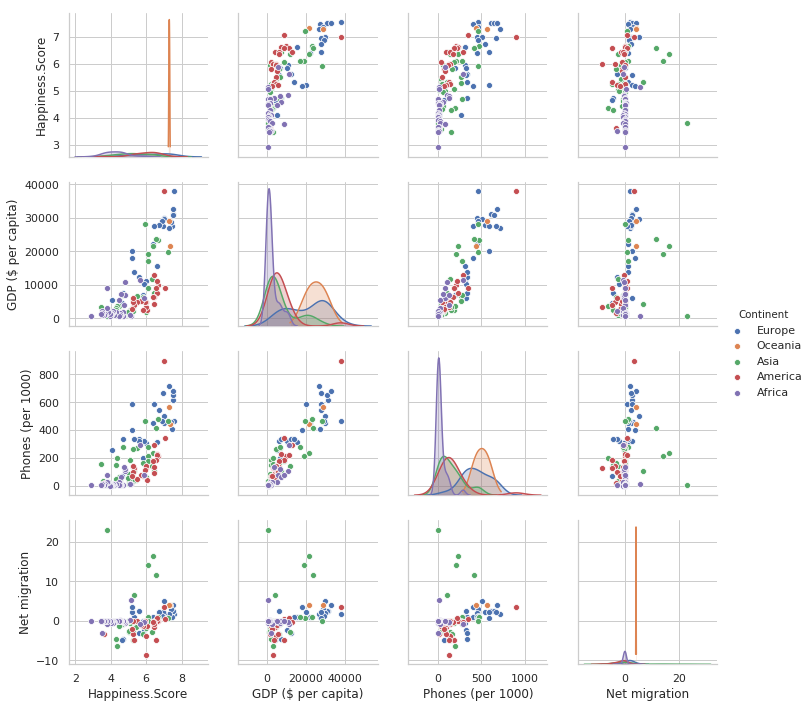

In [139]:
sns.set(style="whitegrid")


sns.pairplot(graphDat, hue='Continent', vars=['Happiness.Score', 'GDP ($ per capita)', 'Phones (per 1000)', 'Net migration']);

We will focus on the first column of graphs. Here we can see that there is somewhat a correlation between happiness score and GDP and the ammount of Phones per person.

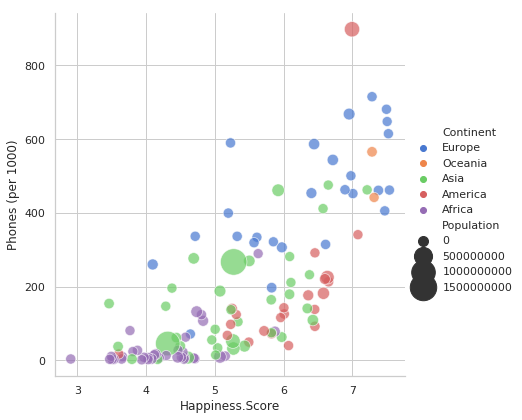

In [140]:
sns.relplot(x="Happiness.Score", y="Phones (per 1000)", hue="Continent", size="Population",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

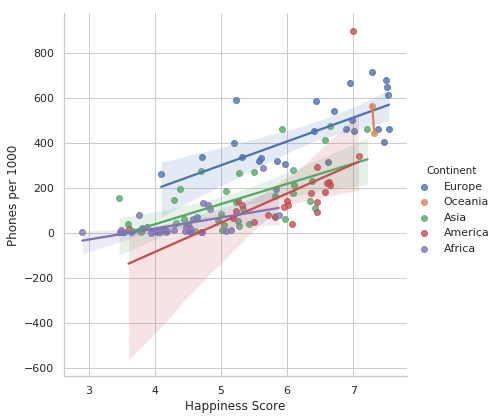

In [141]:
g = sns.lmplot(x="Happiness.Score", y="Phones (per 1000)", hue="Continent",
               truncate=True, height=6, data=graphDat)
g.set_axis_labels("Happiness Score", "Phones per 1000")
plt.show()

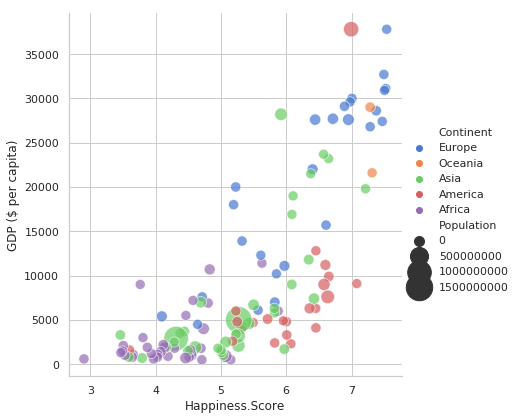

In [142]:
sns.relplot(x="Happiness.Score", y="GDP ($ per capita)", hue="Continent", size="Population",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

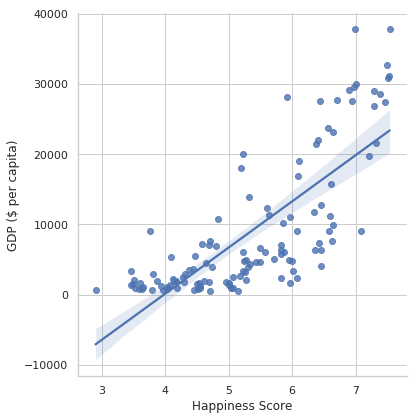

In [143]:
g = sns.lmplot(x="Happiness.Score", y="GDP ($ per capita)",
               truncate=True, height=6, data=graphDat)
g.set_axis_labels("Happiness Score", "GDP ($ per capita)")
plt.show()

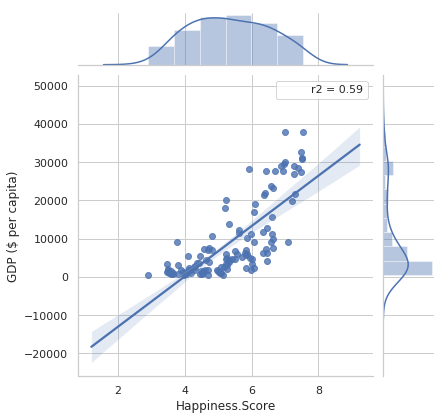

In [145]:
sns.jointplot(x=graphDat['Happiness.Score'], y=graphDat['GDP ($ per capita)'], kind="reg", stat_func=r2)

Looking closer into Happiness, GDP, and Phones, we see a correlation. 

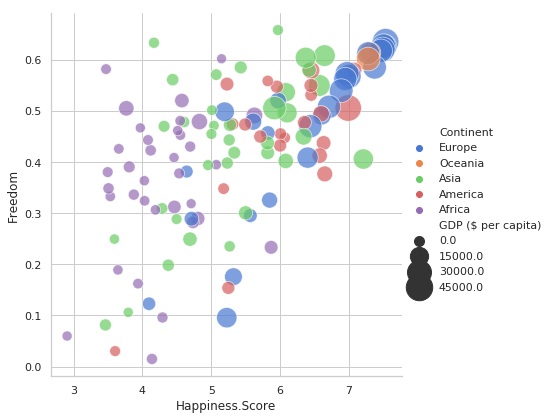

In [146]:
sns.relplot(x="Happiness.Score", y="Freedom", hue="Continent", size="GDP ($ per capita)",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

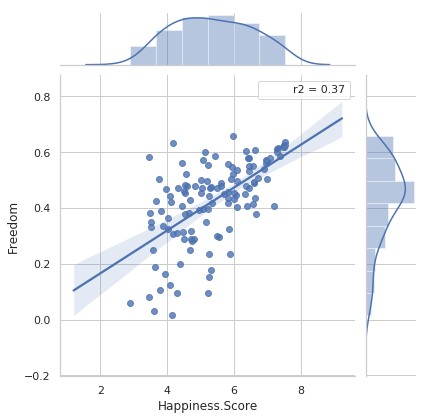

In [147]:
sns.jointplot(x=graphDat['Happiness.Score'], y=graphDat['Freedom'], kind="reg", stat_func=r2)

We see an interesting point here. A country is both happy and free most likely when their GDP is high.

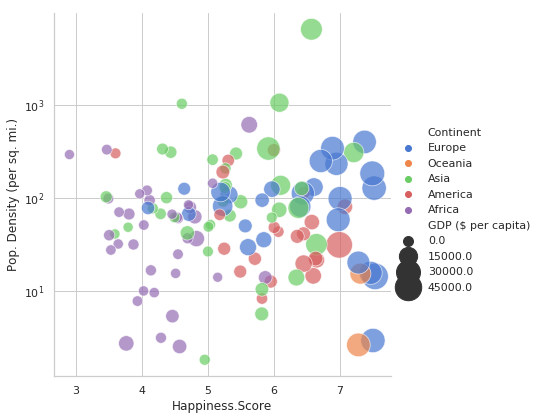

In [148]:
g = sns.relplot(x="Happiness.Score", y="Pop. Density (per sq. mi.)", hue="Continent", size="GDP ($ per capita)",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

g.fig.get_axes()[0].set_yscale('log')
plt.show()

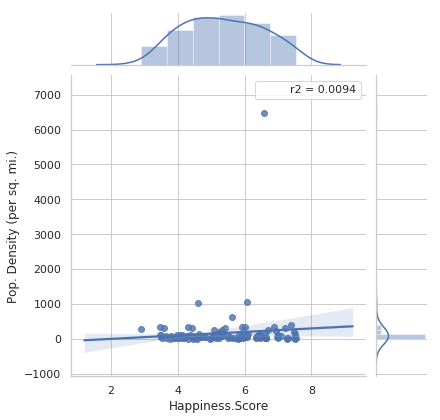

In [149]:
sns.jointplot(x=graphDat['Happiness.Score'], y=graphDat['Pop. Density (per sq. mi.)'], kind="reg", stat_func=r2)

Again, happiness score, popularity density, and GDP correlates.

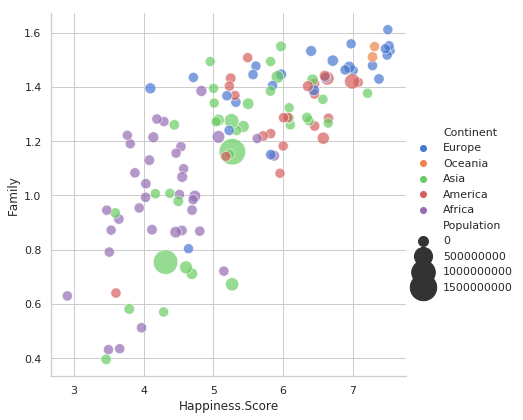

In [116]:
sns.relplot(x="Happiness.Score", y="Family", hue="Continent", size="Population",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

In [ ]:
Pop. Density (per sq. mi.)

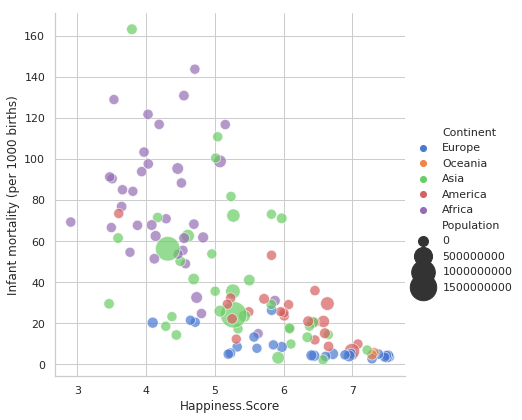

In [117]:
sns.relplot(x="Happiness.Score", y="Infant mortality (per 1000 births)", hue="Continent", size="Population",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

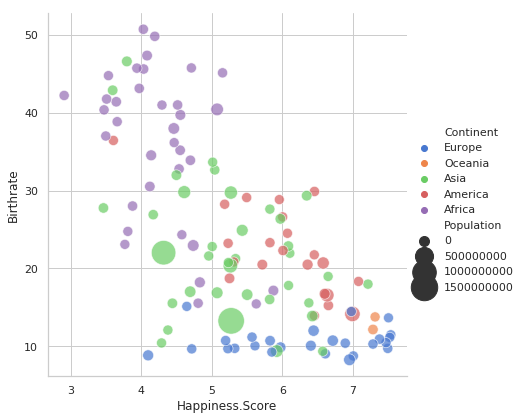

In [118]:
sns.relplot(x="Happiness.Score", y="Birthrate", hue="Continent", size="Population",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

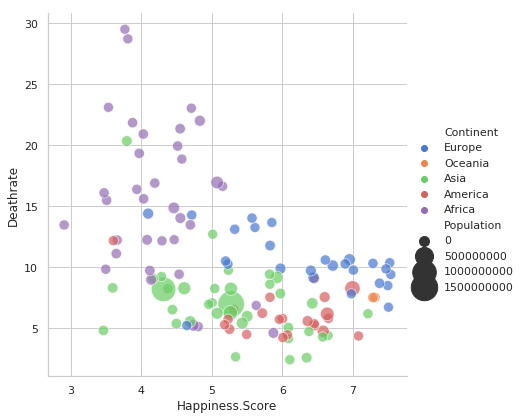

In [119]:
sns.relplot(x="Happiness.Score", y="Deathrate", hue="Continent", size="Population",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)

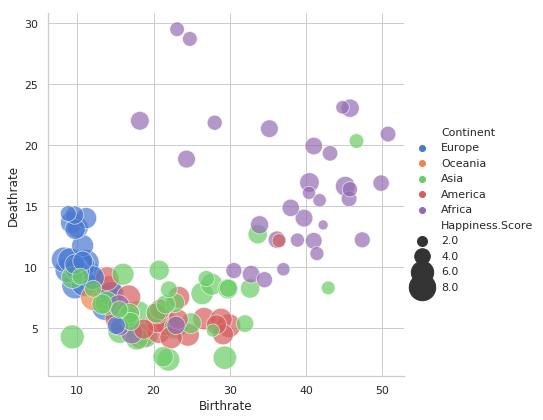

In [120]:
sns.relplot(x="Birthrate", y="Deathrate", hue="Continent", size="Happiness.Score",
            sizes=(100, 700), alpha=.7, palette="muted",
            height=6, data=graphDat)